In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from scipy.optimize import curve_fit

In [3]:
# Load the lora_image_count.pkl file
with open('lora_image_count.pkl', 'rb') as f:
    lora_image_count = pickle.load(f)


[(0, 930), (1, 577), (2, 508), (3, 393), (4, 336), (5, 324), (6, 282), (7, 278), (8, 270), (9, 260)]


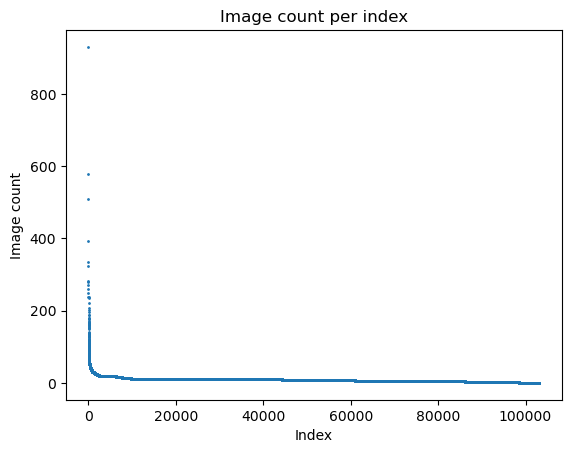

In [4]:
# Make a list of (index, download_count) tuples
data = [(i, count) for i, count in enumerate(lora_image_count)]
print(data[:10])

# Plot the data
plt.figure()
plt.scatter(*zip(*data), s=1)
plt.xlabel('Index')
plt.ylabel('Image count')
plt.title('Image count per index')
plt.show()


### Power Law

Fitted power law: y = exp(7.28)x^-0.50
Mean Squared Error (MSE): 33.243749991567014
Root Mean Squared Error (RMSE): 5.76573932740347
Mean Absolute Error (MAE): 2.1646232587798107


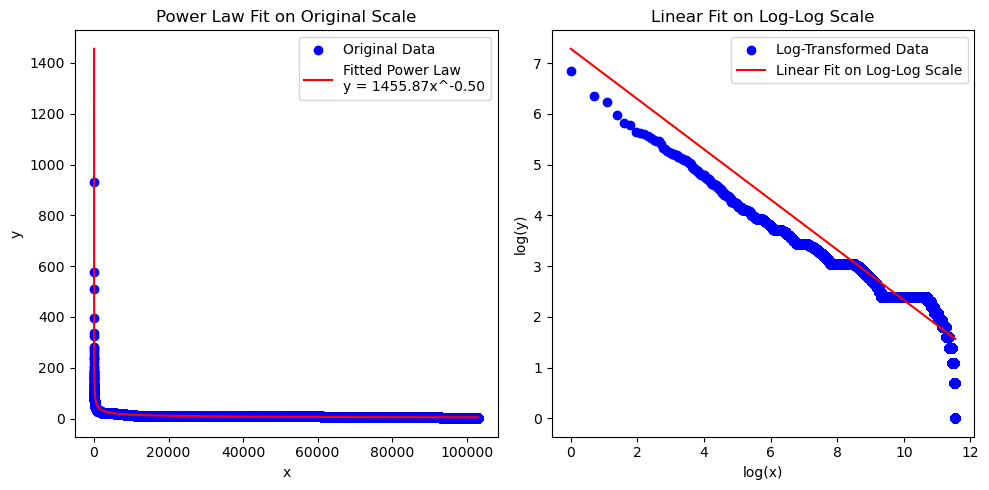

In [6]:
x = np.array([d[0] for d in data]) + 1  # Add 1 to avoid log(0)
y = np.array([d[1] for d in data]) + 1  # Add 1 to avoid log(0)

# Transform data
log_x = np.log(x)
log_y = np.log(y)

# Fit linear regression to transformed data
coefficients = np.polyfit(log_x, log_y, 1)  # Linear fit
k = coefficients[0]  # This is the power-law exponent
b = coefficients[1]  # This is the log(a)
print(f'Fitted power law: y = exp({b:.2f})x^{k:.2f}')

# Compute fitted y values
fitted_log_y = np.poly1d(coefficients)(log_x)
fitted_y = np.exp(fitted_log_y)  # Convert back by exponentiating

# Calculate predicted y values using the power-law model
y_pred = np.exp(b) * x**k

# Calculate performance metrics
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - y_pred))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plotting the results
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, fitted_y, color='red', label=f'Fitted Power Law\ny = {np.exp(b):.2f}x^{k:.2f}')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Law Fit on Original Scale')
plt.legend()

# Log-Log Plot
plt.subplot(1, 2, 2)
plt.scatter(log_x, log_y, color='blue', label='Log-Transformed Data')
plt.plot(log_x, fitted_log_y, color='red', label='Linear Fit on Log-Log Scale')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Linear Fit on Log-Log Scale')
plt.legend()

plt.tight_layout()
plt.show()


### Log-Normal

Mean Squared Error (MSE): 16.78558839415267
Root Mean Squared Error (RMSE): 4.0970218932967235
Mean Absolute Error (MAE): 2.0714430392296235


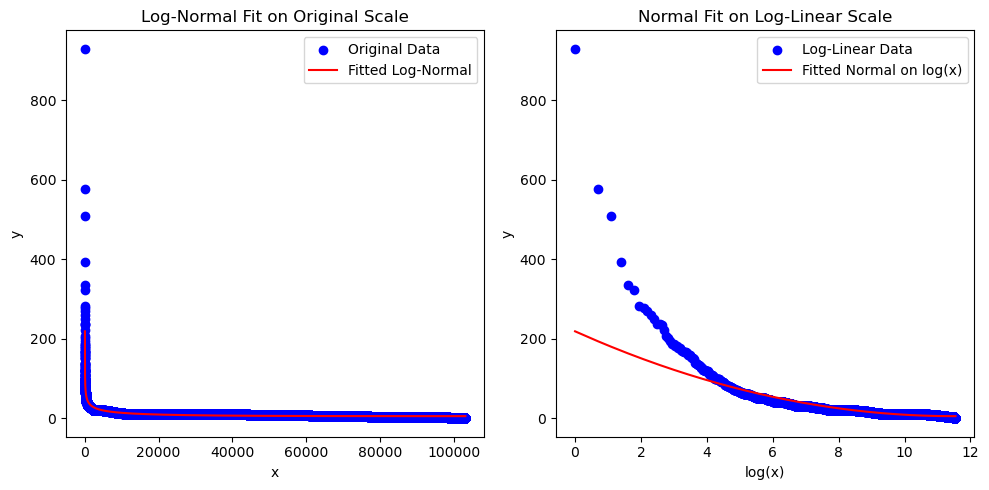

In [10]:
x = np.array([d[0] for d in data]) + 1  # Add 1 to avoid log(0)
y = np.array([d[1] for d in data])
log_x = np.log(x)


#function declaration with additional offset parameter
def Gauss(x, a, x0, sigma, offset):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

popt, pcov = curve_fit(Gauss, log_x, y, p0=[np.max(y), np.median(log_x), np.std(log_x), np.min(y)])

# Compute fitted y values
fitted_y = Gauss(log_x, *popt)

# Calculate performance metrics
mse = np.mean((y - fitted_y)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - fitted_y))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


# Plotting the results
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, fitted_y, color='red', label='Fitted Log-Normal')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Log-Normal Fit on Original Scale')
plt.legend()

# Log-Log Plot
plt.subplot(1, 2, 2)
plt.scatter(log_x, y, color='blue', label='Log-Linear Data')
plt.plot(log_x, fitted_y, color='red', label='Fitted Normal on log(x)')
plt.xlabel('log(x)')
plt.ylabel('y')
plt.title('Normal Fit on Log-Linear Scale')
plt.legend()

plt.tight_layout()
plt.show()


### Pareto

Mean Squared Error (MSE): 135.58719398682936
Root Mean Squared Error (RMSE): 11.644191426923097
Mean Absolute Error (MAE): 8.317617405596666


/var/folders/zj/jld4tq913xnccmf_0l98zykm0000gn/T/ipykernel_94415/3000460101.py:6: RuntimeWarning: invalid value encountered in scalar power
  return (a * (x_min**a)) / (x**(a+1))


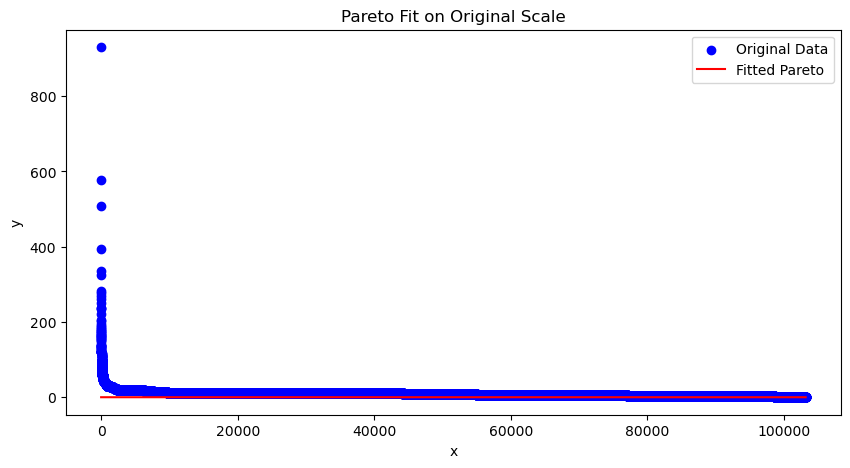

In [40]:
x = np.array([d[0] for d in data]) + 1  # Add 1 to avoid log(0)
y = np.array([d[1] for d in data])

#function declaration with additional offset parameter
def Pareto(x, a, x_min):
    return (a * (x_min**a)) / (x**(a+1))

a = 0.000002639
popt, pcov = curve_fit(Pareto, x, y, p0=[a, np.min(x)])

# Compute fitted y values
fitted_y = Pareto(x, *popt)

# Calculate performance metrics
mse = np.mean((y - fitted_y)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - fitted_y))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


# Plotting the results
plt.figure(figsize=(10, 5))

# Original Data
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, fitted_y, color='red', label='Fitted Pareto')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Pareto Fit on Original Scale')
plt.legend()